In [55]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns


pd.options.mode.chained_assignment = None
%matplotlib inline


In [56]:
def read_data(data = 'data_name')->pd.DataFrame:
    df = pd.read_csv(data, delimiter = ';', low_memory = False)
    df['date'] = pd.to_datetime(df['date'], format='%y%m%d')
    return df

In [57]:
df = read_data(data = "D:/Hack-O-Hire/data/trans.csv")
df.head()


df.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  int64         
 1   account_id  1056320 non-null  int64         
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  object        
 4   operation   873206 non-null   object        
 5   amount      1056320 non-null  float64       
 6   balance     1056320 non-null  float64       
 7   k_symbol    574439 non-null   object        
 8   bank        273508 non-null   object        
 9   account     295389 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


In [59]:
df.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

In [60]:
def filter_features(ls = [], df = pd.DataFrame)->pd.DataFrame:
    features = ['date', 'account_id', 'type', 'amount']
    
    df = df[['date', 'account_id', 'type', 'amount']]
    to_replace = {'PRIJEM': 'CREDIT', 'VYDAJ': 'WITHDRAWAL', 'VYBER': 'NOT SURE', 'DEBIT': 'WITHDRAWAL'}
    df['type'] = df['type'].replace(to_replace)
    if 'date' in ls:
        df['date'] = pd.to_datetime(df['date'], format='%y%m%d')
    df = df[df['type'] == 'WITHDRAWAL']
    df.sort_values(by = 'account_id')
    df.set_index('date',inplace = True)
    df['sum_5days'] = df.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).sum())
    df['count_5days'] = df.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).count())
    return df




In [61]:
df_new = filter_features(ls = df.columns, df = df )
df_new

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1993-01-31,2378,WITHDRAWAL,34700.0,34700.0,1.0
1993-02-03,485,WITHDRAWAL,25300.0,25300.0,1.0
1993-02-06,3510,WITHDRAWAL,1600.0,1600.0,1.0
1993-02-07,2378,WITHDRAWAL,9612.0,9612.0,1.0
1993-02-07,2122,WITHDRAWAL,14100.0,14100.0,1.0
...,...,...,...,...,...
1998-12-31,2346,WITHDRAWAL,14.9,14.9,1.0
1998-12-31,5066,WITHDRAWAL,3.5,3.5,1.0
1998-12-31,7520,WITHDRAWAL,67.2,197.4,2.0


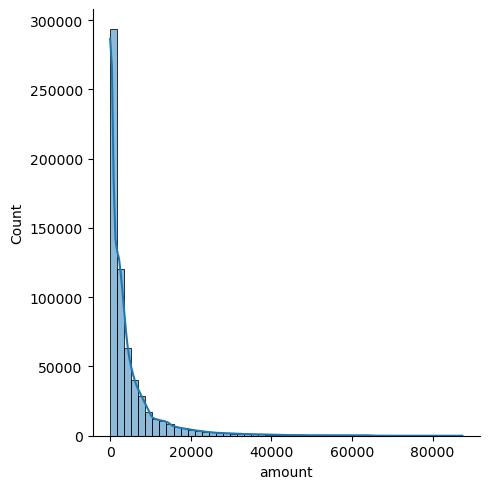

In [62]:
sns.displot(df_new['amount'], bins = 50, kde = True)

In [63]:
to_replace = {'PRIJEM': 'CREDIT', 'VYDAJ': 'WITHDRAWAL', 'VYBER': 'NOT SURE', 'DEBIT': 'WITHDRAWAL'}
df_new['type'] = df_new['type'].replace(to_replace)

In [64]:
df_new

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1993-01-31,2378,WITHDRAWAL,34700.0,34700.0,1.0
1993-02-03,485,WITHDRAWAL,25300.0,25300.0,1.0
1993-02-06,3510,WITHDRAWAL,1600.0,1600.0,1.0
1993-02-07,2378,WITHDRAWAL,9612.0,9612.0,1.0
1993-02-07,2122,WITHDRAWAL,14100.0,14100.0,1.0
...,...,...,...,...,...
1998-12-31,2346,WITHDRAWAL,14.9,14.9,1.0
1998-12-31,5066,WITHDRAWAL,3.5,3.5,1.0
1998-12-31,7520,WITHDRAWAL,67.2,197.4,2.0


<Axes: xlabel='type', ylabel='count'>

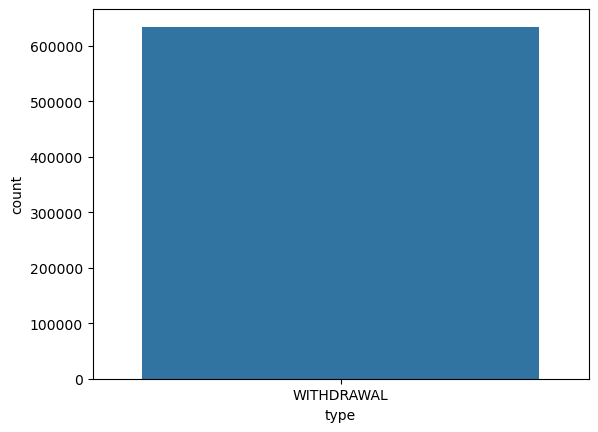

In [65]:
sns.countplot(x = 'type', data = df_new)

In [66]:
df_new.head()

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1993-01-31,2378,WITHDRAWAL,34700.0,34700.0,1.0
1993-02-03,485,WITHDRAWAL,25300.0,25300.0,1.0
1993-02-06,3510,WITHDRAWAL,1600.0,1600.0,1.0
1993-02-07,2378,WITHDRAWAL,9612.0,9612.0,1.0
1993-02-07,2122,WITHDRAWAL,14100.0,14100.0,1.0


In [67]:
df_new = df_new[df_new['type'] == 'WITHDRAWAL']
df_new.sort_values(by = 'account_id')

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1995-09-20,1,WITHDRAWAL,700.0,700.0,1.0
1997-05-31,1,WITHDRAWAL,14.6,1184.6,2.0
1997-10-31,1,WITHDRAWAL,14.6,14.6,1.0
1996-05-13,1,WITHDRAWAL,660.0,660.0,1.0
1996-01-05,1,WITHDRAWAL,2452.0,2662.0,2.0
...,...,...,...,...,...
1996-03-17,11382,WITHDRAWAL,24500.0,24500.0,1.0
1998-10-31,11382,WITHDRAWAL,14.6,14.6,1.0
1997-01-17,11382,WITHDRAWAL,7500.0,12000.0,2.0


In [68]:
df_new.set_index('date',inplace = True)
df_new[0:5]

KeyError: "None of ['date'] are in the columns"

In [69]:
df_new['sum_5days'] = df_new.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).sum())
df_new['count_5days'] = df_new.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).count())

In [70]:
df_new

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1993-01-31,2378,WITHDRAWAL,34700.0,34700.0,1.0
1993-02-03,485,WITHDRAWAL,25300.0,25300.0,1.0
1993-02-06,3510,WITHDRAWAL,1600.0,1600.0,1.0
1993-02-07,2378,WITHDRAWAL,9612.0,9612.0,1.0
1993-02-07,2122,WITHDRAWAL,14100.0,14100.0,1.0
...,...,...,...,...,...
1998-12-31,2346,WITHDRAWAL,14.9,14.9,1.0
1998-12-31,5066,WITHDRAWAL,3.5,3.5,1.0
1998-12-31,7520,WITHDRAWAL,67.2,197.4,2.0


C:\Users\yashv\AppData\Local\Temp\ipykernel_18964\1076992434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['sum_5days'], bins=50)


<Axes: xlabel='sum_5days', ylabel='Density'>

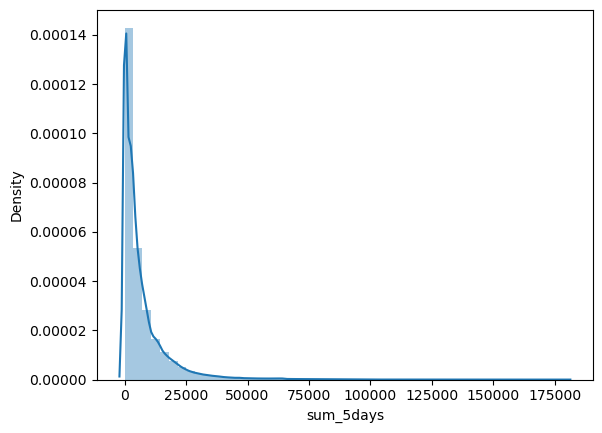

In [71]:
sns.distplot(df_new['sum_5days'], bins=50)

# sns.countplot(x='count_5days', data=df_new)

# sns.catplot(x="count_5days", y="sum_5days",
#             kind="box", data=df_new, order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#             aspect=3.0)


<Axes: xlabel='count_5days', ylabel='count'>

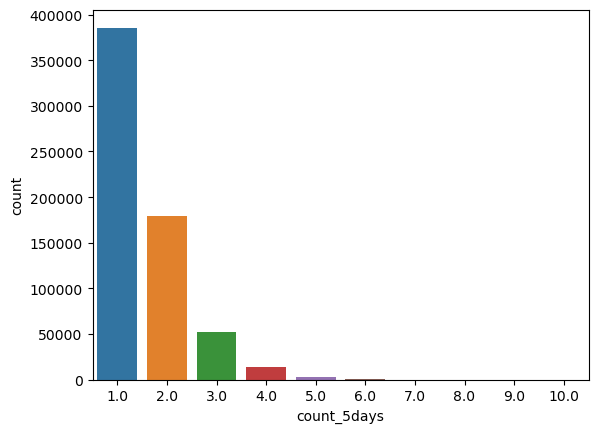

In [72]:
sns.countplot(x='count_5days', data=df_new)


In [43]:
!pip install pyod

In [73]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


anomaly_proportion = 0.001

clf_name = 'Anomaly Detection - Isolation Forest'
clf = IForest(contamination = anomaly_proportion)

X = df_new[['count_5days', 'sum_5days']]

clf.fit(X)

# get the prediction labels and outlier scores of the training data
df_new['y_pred'] = clf.labels_ # binary labels (0: inliers, 1: outliers)
df_new['y_scores'] = clf.decision_scores_ # raw outlier scores. The bigger the number the greater the anomaly.



In [74]:
df_new[df_new['y_pred'] == 1]

,account_id,type,amount,sum_5days,count_5days,y_pred,y_scores
date,,,,,,,
1993-06-10,7231,WITHDRAWAL,76500.0,76500.0,1.0,1,0.008457
1993-08-03,2176,WITHDRAWAL,10300.0,113400.0,4.0,1,0.018618
1993-08-03,2176,WITHDRAWAL,28400.0,141800.0,5.0,1,0.048223
1993-08-03,3374,WITHDRAWAL,61500.0,89414.6,4.0,1,0.014324
1993-08-05,2176,WITHDRAWAL,1085.0,142885.0,6.0,1,0.057204
...,...,...,...,...,...,...,...
1998-12-14,5283,WITHDRAWAL,52000.0,104108.0,5.0,1,0.048223
1998-12-15,8899,WITHDRAWAL,6300.0,41501.8,6.0,1,0.005275
1998-12-15,998,WITHDRAWAL,87400.0,87400.0,1.0,1,0.011651


Text(0, 0.5, '5-day sum of withdrawal transactions')

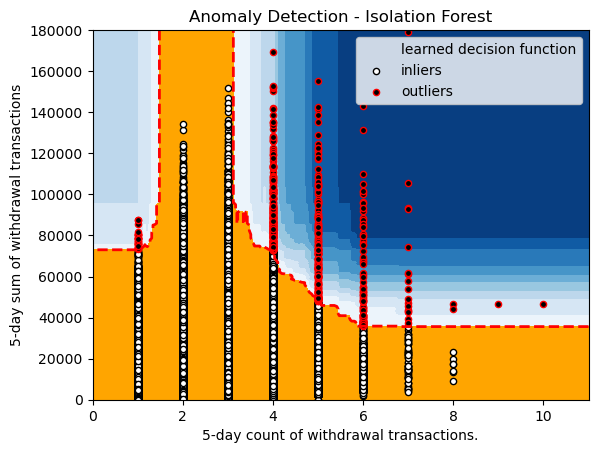

In [77]:
df_withdrawals = df_new
xx , yy = np.meshgrid(np.linspace(0, 11, 200), np.linspace(0, 180000, 200))

# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])*-1
Z = Z.reshape(xx.shape)


threshold = (df_withdrawals.loc[df_withdrawals['y_pred'] == 1, 'y_scores'].min()*-1)/2 + (df_withdrawals.loc[df_withdrawals['y_pred'] == 0, 'y_scores'].max()*-1)/2


subplot = plt.subplot(1, 1, 1)

# fill blue colormap from minimum anomaly score to threshold value
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

# draw red contour line where anomaly score is equal to threshold
a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')


msk = df_withdrawals['y_pred'] == 0
x = df_withdrawals.loc[msk, ['count_5days', 'sum_5days']].values

# scatter plot of inliers with white dots
b = subplot.scatter(x[:, 0], x[:, 1], c='white',s=20, edgecolor='k')


msk = df_withdrawals['y_pred'] == 1
x = df_withdrawals.loc[msk, ['count_5days', 'sum_5days']].values

# scatter plot of outliers with black dots
c = subplot.scatter(x[:, 0], x[:, 1], c='black',s=20, edgecolor='r')
subplot.axis('tight')



subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'inliers', 'outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='upper right')

subplot.set_title(clf_name)
subplot.set_xlim((0, 11))
subplot.set_ylim((0, 180000))

subplot.set_xlabel("5-day count of withdrawal transactions.")
subplot.set_ylabel("5-day sum of withdrawal transactions")

array([[ 0.        ,  0.05527638,  0.11055276, ..., 10.88944724,
        10.94472362, 11.        ],
       [ 0.        ,  0.05527638,  0.11055276, ..., 10.88944724,
        10.94472362, 11.        ],
       [ 0.        ,  0.05527638,  0.11055276, ..., 10.88944724,
        10.94472362, 11.        ],
       ...,
       [ 0.        ,  0.05527638,  0.11055276, ..., 10.88944724,
        10.94472362, 11.        ],
       [ 0.        ,  0.05527638,  0.11055276, ..., 10.88944724,
        10.94472362, 11.        ],
       [ 0.        ,  0.05527638,  0.11055276, ..., 10.88944724,
        10.94472362, 11.        ]])

In [80]:
from joblib import dump, load

dump(clf, 'clf.joblib')

['clf.joblib']

In [78]:
import matplotlib.pyplot as plt
import matplotlib

def visualize_anomaly_detection(df_withdrawals, clf, clf_name):
    """
    Visualize the results of anomaly detection using Isolation Forest.

    Args:
    df_withdrawals (DataFrame): DataFrame containing withdrawal transaction data.
    clf: Isolation Forest model trained for anomaly detection.
    clf_name (str): Name of the Isolation Forest model.

    Returns:
    None
    """
    xx , yy = np.meshgrid(np.linspace(0, 11, 200), np.linspace(0, 180000, 200))

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    threshold = (df_withdrawals.loc[df_withdrawals['y_pred'] == 1, 'y_scores'].min() * -1) / 2 + \
                (df_withdrawals.loc[df_withdrawals['y_pred'] == 0, 'y_scores'].max() * -1) / 2

    subplot = plt.subplot(1, 1, 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')

    msk = df_withdrawals['y_pred'] == 0
    x = df_withdrawals.loc[msk, ['count_5days', 'sum_5days']].values

    # scatter plot of inliers with white dots
    b = subplot.scatter(x[:, 0], x[:, 1], c='white', s=20, edgecolor='k')

    msk = df_withdrawals['y_pred'] == 1
    x = df_withdrawals.loc[msk, ['count_5days', 'sum_5days']].values

    # scatter plot of outliers with black dots
    c = subplot.scatter(x[:, 0], x[:, 1], c='black', s=20, edgecolor='r')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'inliers', 'outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='upper right')

    subplot.set_title(clf_name)
    subplot.set_xlim((0, 11))
    subplot.set_ylim((0, 180000))

    subplot.set_xlabel("5-day count of withdrawal transactions.")
    subplot.set_ylabel("5-day sum of withdrawal transactions")

    plt.show()


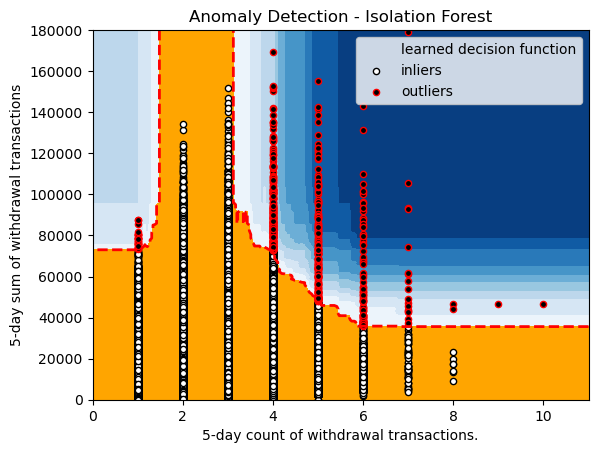

In [79]:
# Assuming you have already imported the necessary libraries and defined the function visualize_anomaly_detection()

# Call the function and pass the required arguments
visualize_anomaly_detection(df_withdrawals, clf, clf_name)
